In [17]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re
from collections import Counter
from matplotlib import pyplot as plt
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

In [18]:
# Import Dataset
df = pd.read_csv("youtube_toxic_comments_cleaned_data.csv")
df.head()

,corpus_name,raw_sentence,label,clean_sentence_training,clean_sentence_EDA
0,youtube_toxic_comments,If only people would just take a step back and...,0,If only people would just take a step back and...,If only people would just take a step back and...
1,youtube_toxic_comments,Law enforcement is not trained to shoot to app...,1,Law enforcement is not trained to shoot to app...,Law enforcement is not trained to shoot to app...
2,youtube_toxic_comments,\nDont you reckon them 'black lives matter' ba...,1,Dont you reckon them black lives matter banner...,Dont you reckon them black lives matter banner...
3,youtube_toxic_comments,There are a very large number of people who do...,0,There are a very large number of people who do...,There are a very large number of people who do...
4,youtube_toxic_comments,"The Arab dude is absolutely right, he should h...",0,The Arab dude is absolutely right he should ha...,The Arab dude is absolutely right he should ha...


In [19]:
df.shape

(1000, 5)

There are 1000 rows and 5 columns.

### Cleaning

In [20]:
def clean_text(text):
    text = re.sub('\n','', text)
    return text

In [21]:
df['raw_sentence'] = df['raw_sentence'].apply(clean_text)
df.head()

,corpus_name,raw_sentence,label,clean_sentence_training,clean_sentence_EDA
0,youtube_toxic_comments,If only people would just take a step back and...,0,If only people would just take a step back and...,If only people would just take a step back and...
1,youtube_toxic_comments,Law enforcement is not trained to shoot to app...,1,Law enforcement is not trained to shoot to app...,Law enforcement is not trained to shoot to app...
2,youtube_toxic_comments,Dont you reckon them 'black lives matter' bann...,1,Dont you reckon them black lives matter banner...,Dont you reckon them black lives matter banner...
3,youtube_toxic_comments,There are a very large number of people who do...,0,There are a very large number of people who do...,There are a very large number of people who do...
4,youtube_toxic_comments,"The Arab dude is absolutely right, he should h...",0,The Arab dude is absolutely right he should ha...,The Arab dude is absolutely right he should ha...


### Statistics

<AxesSubplot:>

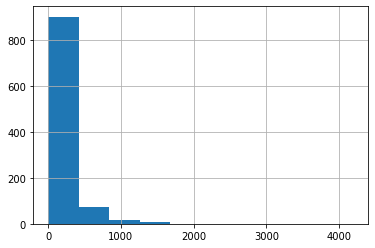

In [22]:
# cheching the number of characters in the sentences
# the colums we are extracting sentences from is assigned here and throughout to the variable 'data'

data = df['clean_sentence_EDA']
data.str.len().hist()

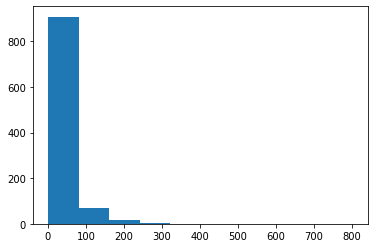

In [23]:
# count words to gain insights

counts = []

for sentence in df['clean_sentence_EDA']:
    sentence = word_tokenize(str(sentence))
    word_count = len(sentence)
    counts.append(word_count)

plt.hist(counts)
plt.show()

In [24]:
# basic metrics

total_num_words = sum(counts) # total number of words
average_sentence_length = np.mean(counts) # print average sentence length

word_lengths = []
for sentence in df['clean_sentence_EDA']:
    sentence = word_tokenize(str(sentence))
    for word in sentence:
        length = len(word)
        word_lengths.append(length)

average_word_length = np.mean(word_lengths) # print everage word length

print(f'Total number of words in the dataset: {total_num_words} words.')
print(f'Average length of words in the dataset: {average_word_length} characters.')
print(f'Average length of sentences in the dataset: {average_sentence_length} words.')

Total number of words in the dataset: 33273 words.
Average length of words in the dataset: 4.3517867339885195 characters.
Average length of sentences in the dataset: 33.273 words.


The histograms and metrics above show that most sentences in the corpus are about 200-300 character or 33 word long. The total number of words in the dataset is 33273. The average length of words is 4 characters.

### Most frequent words

In [25]:
all_words = []

for sentence in df['clean_sentence_EDA']:
    words = word_tokenize(str(sentence))
    for word in words:
        all_words.append(word)

print(all_words[:100])

['If', 'only', 'people', 'would', 'just', 'take', 'a', 'step', 'back', 'and', 'not', 'make', 'this', 'case', 'about', 'them', 'because', 'it', 'wasnt', 'about', 'anyone', 'except', 'the', 'two', 'people', 'in', 'that', 'situation', 'To', 'lump', 'yourself', 'into', 'this', 'mess', 'and', 'take', 'matters', 'into', 'your', 'own', 'hands', 'makes', 'these', 'kinds', 'of', 'protests', 'selfish', 'and', 'without', 'rational', 'thought', 'and', 'investigation', 'The', 'guy', 'in', 'this', 'video', 'is', 'heavily', 'emotional', 'and', 'hyped', 'up', 'and', 'wants', 'to', 'be', 'heard', 'and', 'when', 'he', 'gets', 'heard', 'he', 'just', 'presses', 'more', 'and', 'more', 'He', 'was', 'never', 'out', 'to', 'have', 'a', 'reasonable', 'discussion', 'Kudos', 'to', 'the', 'Smerconish', 'for', 'keeping', 'level', 'the', 'whole', 'time', 'and']


In [26]:
# let us find the 20 most common words now

most_common = Counter(all_words).most_common(20)
print(most_common)

[('the', 1403), ('to', 802), ('and', 763), ('a', 761), ('of', 587), ('is', 523), ('that', 430), ('in', 422), ('you', 378), ('I', 374), ('are', 311), ('this', 284), ('was', 258), ('it', 251), ('people', 242), ('for', 242), ('not', 221), ('they', 219), ('have', 210), ('on', 205)]


<AxesSubplot:>

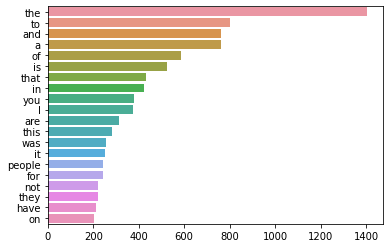

In [27]:
words, frequency = [], []
for word, count in most_common:
    words.append(word)
    frequency.append(count)
    
sns.barplot(x = frequency, y = words)

In [28]:
all_words_clean = []

for sentence in df['clean_sentence_EDA']:
    words = word_tokenize(str(sentence))
    for word in words:
        word = word.lower() # lowercase all word
        if len(word) >= 3: # quick solution to get rif of contractions
            # find better solution in official version
            all_words_clean.append(word)

print(all_words_clean[:100])

['only', 'people', 'would', 'just', 'take', 'step', 'back', 'and', 'not', 'make', 'this', 'case', 'about', 'them', 'because', 'wasnt', 'about', 'anyone', 'except', 'the', 'two', 'people', 'that', 'situation', 'lump', 'yourself', 'into', 'this', 'mess', 'and', 'take', 'matters', 'into', 'your', 'own', 'hands', 'makes', 'these', 'kinds', 'protests', 'selfish', 'and', 'without', 'rational', 'thought', 'and', 'investigation', 'the', 'guy', 'this', 'video', 'heavily', 'emotional', 'and', 'hyped', 'and', 'wants', 'heard', 'and', 'when', 'gets', 'heard', 'just', 'presses', 'more', 'and', 'more', 'was', 'never', 'out', 'have', 'reasonable', 'discussion', 'kudos', 'the', 'smerconish', 'for', 'keeping', 'level', 'the', 'whole', 'time', 'and', 'letting', 'masri', 'make', 'himself', 'out', 'fool', 'how', 'dare', 'and', 'those', 'that', 'tore', 'that', 'city', 'down', 'protest', 'make']


In [29]:
# let us find the 20 most common words now (after second round of pre-processing)

most_common2 = Counter(all_words_clean).most_common(20)
print(most_common2)

[('the', 1545), ('and', 812), ('that', 459), ('you', 458), ('this', 387), ('are', 320), ('was', 261), ('people', 256), ('they', 256), ('for', 253), ('black', 246), ('not', 242), ('have', 214), ('all', 208), ('with', 203), ('police', 175), ('but', 160), ('what', 155), ('just', 151), ('like', 151)]


<AxesSubplot:>

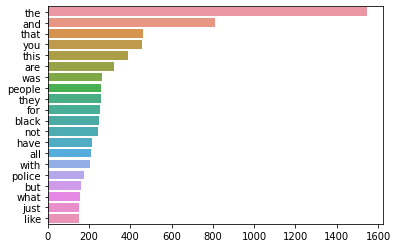

In [30]:
# word frequency after second round of pre-processing

words, frequency = [], []
for word, count in most_common2:
    words.append(word)
    frequency.append(count)
    
sns.barplot(x = frequency, y = words)

### Label balance

In [31]:
risky = 0
potentially_risky = 0
non_risky = 0
void = 0
other = 0

for label in str(df['label']):
    if label == '1':
        potentially_risky += 1
    elif label == '2':
        risky += 1
    elif label == '0':
        non_risky += 1
    elif label == "":
        void += 1
    else:
        other += 1

print(risky)
print(potentially_risky)
print(non_risky)
print(other)
print(void)

1
5
11
121
0


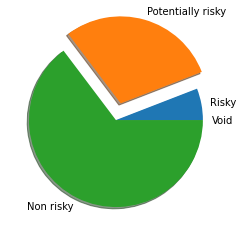

In [32]:
# plot a pie chart to show label proportions

y = np.array([risky, potentially_risky, non_risky, void])
custom_labels = ["Risky", "Potentially risky", "Non risky", "Void"]
myexplode = [0, 0.2, 0, 0] # not compulsory (use for interesting value, i.e, most or least represented)

plt.pie(y, labels = custom_labels, explode = myexplode, shadow = True)
plt.show() 

### Cloud

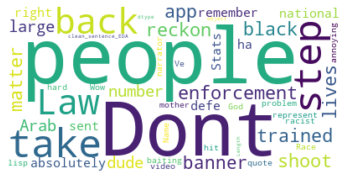

In [33]:
# create a word cloud
# make sure the dataset is nice and clean before generating this

word_cloud = WordCloud(collocations = False, background_color = 'white').generate(str(df['clean_sentence_EDA']))

plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()